# K - Nearest Neighbor (KNN)
- Problem of classification


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from numpy.random import randint, randn

# Calculate distance between two vectors
- Using **Euclidean distance**


7.280109889280518


array([11.18033989, 18.38477631])

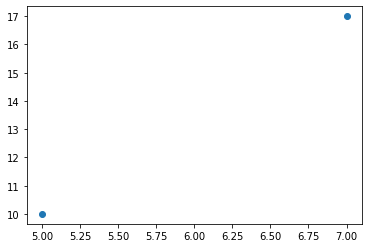

In [ ]:
_, axe = plt.subplots()

x = [5, 7]
y = [10, 17]
axe.scatter([5, 7], [10, 17])
distance = math.sqrt((x[0] - x[1])**2 + (y[0] - y[1])**2)
print(distance)

# Using Iris data

In [ ]:
pd_data = pd.read_csv('/content/drive/MyDrive/인공지능 학습/Project/iris.data', header = None)
pd_data.columns = ['sepal_len', 'sepal_width', 'petal_len', 'petal_width', 'class']

pd_data['class'] = pd.Series([n.split(sep = '-')[1] for n in pd_data['class']])
pd_data['class'] = pd_data['class'].astype('category')

print(pd_data.dtypes)
print(pd_data)

# All check
print(pd_data.isnull().values.any())

for x in pd_data:
  if pd_data[x].hasnans:
    print('check ', x)
  else:
    print('OK', x)

print(pd_data.describe())

sepal_len       float64
sepal_width     float64
petal_len       float64
petal_width     float64
class          category
dtype: object
     sepal_len  sepal_width  petal_len  petal_width      class
0          5.1          3.5        1.4          0.2     setosa
1          4.9          3.0        1.4          0.2     setosa
2          4.7          3.2        1.3          0.2     setosa
3          4.6          3.1        1.5          0.2     setosa
4          5.0          3.6        1.4          0.2     setosa
..         ...          ...        ...          ...        ...
145        6.7          3.0        5.2          2.3  virginica
146        6.3          2.5        5.0          1.9  virginica
147        6.5          3.0        5.2          2.0  virginica
148        6.2          3.4        5.4          2.3  virginica
149        5.9          3.0        5.1          1.8  virginica

[150 rows x 5 columns]
False
OK sepal_len
OK sepal_width
OK petal_len
OK petal_width
OK class
        sepal_l

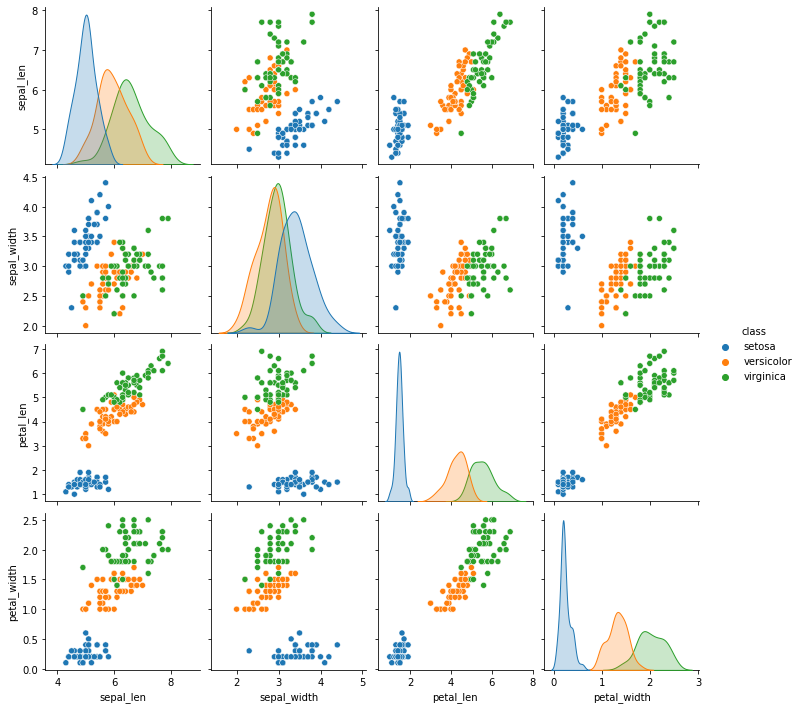

In [ ]:
sns.pairplot(data = pd_data, hue = 'class')

- petal을 통한 classification은 grouping하기에 적합

# Plotting

Text(0.5, 1.0, 'Petal len - petal width')

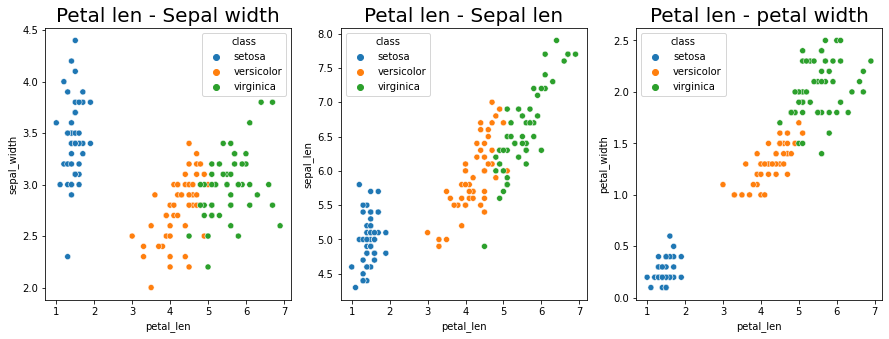

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = [15, 5])

sns.scatterplot(data = pd_data, x = 'petal_len', y = 'sepal_width', ax = axes[0], hue = 'class')
axes[0].set_title('Petal len - Sepal width', fontsize = 20)
sns.scatterplot(data = pd_data, x = 'petal_len', y = 'sepal_len', ax = axes[1], hue = 'class')
axes[1].set_title('Petal len - Sepal len', fontsize = 20)
sns.scatterplot(data = pd_data, x = 'petal_len', y = 'petal_width', ax = axes[2], hue = 'class')
axes[2].set_title('Petal len - petal width', fontsize = 20)

In [ ]:
g1 = pd_data.groupby('class')
print(g1['petal_len'].describe())
print(g1['petal_width'].describe())

            count   mean       std  min  25%   50%    75%  max
class                                                         
setosa       50.0  1.464  0.173511  1.0  1.4  1.50  1.575  1.9
versicolor   50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1
virginica    50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9
            count   mean       std  min  25%  50%  75%  max
class                                                      
setosa       50.0  0.244  0.107210  0.1  0.2  0.2  0.3  0.6
versicolor   50.0  1.326  0.197753  1.0  1.2  1.3  1.5  1.8
virginica    50.0  2.026  0.274650  1.4  1.8  2.0  2.3  2.5


In [ ]:
test_plen = 2.0 
test_pwidth = 0.6

petal_l = pd_data.loc[:,'petal_len'] - test_plen
petal_w = pd_data.loc[:,'petal_width'] - test_pwidth
petal_l = petal_l.apply(np.square)
petal_w = petal_w.apply(np.square)
petal = petal_l + petal_w
pd_data['distance'] = petal.apply(np.sqrt)

pd_data.sort_values('distance', inplace = True)
print(pd_data.head(10))

    sepal_len  sepal_width  petal_len  petal_width   class  distance
44        5.1          3.8        1.9          0.4  setosa  0.223607
23        5.1          3.3        1.7          0.5  setosa  0.316228
5         5.4          3.9        1.7          0.4  setosa  0.360555
43        5.0          3.5        1.6          0.6  setosa  0.400000
24        4.8          3.4        1.9          0.2  setosa  0.412311
18        5.7          3.8        1.7          0.3  setosa  0.424264
26        5.0          3.4        1.6          0.4  setosa  0.447214
20        5.4          3.4        1.7          0.2  setosa  0.500000
31        5.4          3.4        1.5          0.4  setosa  0.538516
21        5.1          3.7        1.5          0.4  setosa  0.538516


(2.0, 0.6)의 점과 모든 다른 점들사이의 거리를 측정했더니,  
가장 가까운 점 (10개)가 모두 setosa이므로  
따라서, petal_len = 2.0, petal_width = 0.6인 경우, setosa라고 판단할 수 있다.

$~$
- K의 값에 따라서 분류의 정확도가 달라짐
- K의 값이 너무 작을 경우, outlier에 취약해짐
- K의 값이 너무 클 경우, 결론을 도출할 수 없음
- 따라서, 사용자의 상황에 맞게 설정해야 함 (설정값)

     sepal_len  sepal_width  petal_len  petal_width       class  distance
119        6.0          2.2        5.0          1.5   virginica  0.000000
52         6.9          3.1        4.9          1.5  versicolor  0.100000
72         6.3          2.5        4.9          1.5  versicolor  0.100000
133        6.3          2.8        5.1          1.5   virginica  0.100000
83         6.0          2.7        5.1          1.6  versicolor  0.141421
77         6.7          3.0        5.0          1.7  versicolor  0.200000
76         6.8          2.8        4.8          1.4  versicolor  0.223607
86         6.7          3.1        4.7          1.5  versicolor  0.300000
56         6.3          3.3        4.7          1.6  versicolor  0.316228
50         7.0          3.2        4.7          1.4  versicolor  0.316228


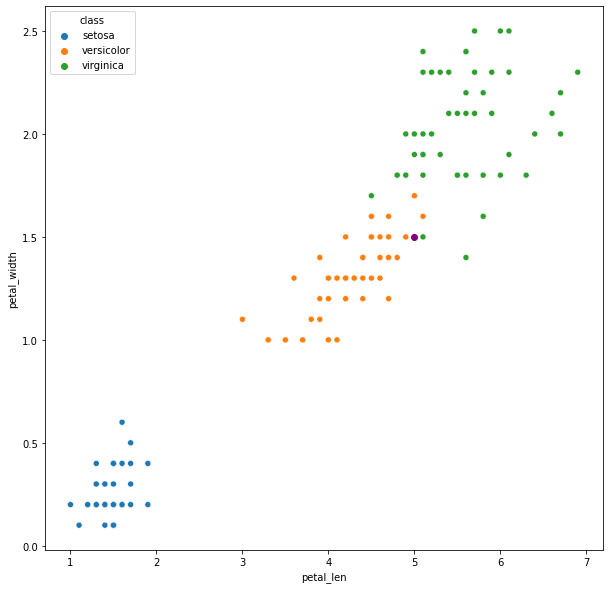

In [ ]:
def my_KNN(data, k, test_plen, test_pwidth):
  x = pd_data.loc[:,'petal_len'] - test_plen
  y = pd_data.loc[:,'petal_width'] - test_pwidth
  pd_data['distance'] = [math.sqrt(z) for z in (x**2 + y**2)]
  pd_data.sort_values('distance', inplace = True)
  print(pd_data.head(k))

my_KNN(pd_data, 10, 5.0, 1.5)

fig, axe = plt.subplots(figsize = [10, 10])
sns.scatterplot(data = pd_data, x = 'petal_len', y = 'petal_width', hue = 'class', ax = axe)
axe.scatter(x = 5.0, y = 1.5, c = 'purple')

    sepal_len  sepal_width  petal_len  petal_width       class  distance
98        5.1          2.5        3.0          1.1  versicolor  0.400000
57        4.9          2.4        3.3          1.0  versicolor  0.424264
93        5.0          2.3        3.3          1.0  versicolor  0.424264
79        5.7          2.6        3.5          1.0  versicolor  0.583095
60        5.0          2.0        3.5          1.0  versicolor  0.583095
81        5.5          2.4        3.7          1.0  versicolor  0.761577
64        5.6          2.9        3.6          1.3  versicolor  0.848528
80        5.5          2.4        3.8          1.1  versicolor  0.894427
69        5.6          2.5        3.9          1.1  versicolor  0.984886
82        5.8          2.7        3.9          1.2  versicolor  1.029563


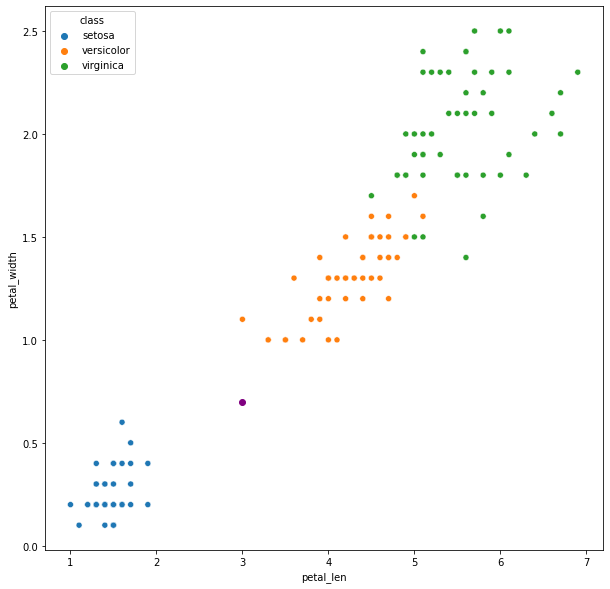

In [ ]:
my_KNN(pd_data, 10, 3.0, 0.7)

fig, axe = plt.subplots(figsize = [10, 10])
sns.scatterplot(data = pd_data, x = 'petal_len', y = 'petal_width', hue = 'class', ax = axe)
axe.scatter(x = 3.0, y = 0.7, c = 'purple')

# 내장된 KNN을 위한 module 사용
- Fit: 학습을 진행하는 과정
    - X: train set (2D array vectors)
    - y: Target values

- Predict: 새로운 값의 분류를 예측하는 과정
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
- https://scikit-learn.org/stable/modules/neighbors.html

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as knc

pd_data = pd.read_csv('/content/drive/MyDrive/인공지능 학습/Project/iris.data', header = None)
pd_data.columns = ['sepal_len', 'sepal_width', 'petal_len', 'petal_width', 'class']

pd_data['class'] = pd.Series([n.split(sep = '-')[1] for n in pd_data['class']]).astype('category')

sk_knn = knc(n_neighbors=10, weights = 'distance')

#fit
"""
DataFrame.valuse -> 2D array vectors로 변환
X = pd_data.loc[:,'petal_len':'petal_width'].values
y = (pd_data['class'].cat.codes).values
"""
sk_knn.fit(pd_data.loc[:,'petal_len':'petal_width'].values, (pd_data['class'].cat.codes).values)

#predict

test = [[2.0, 0.6],
        [4.5, 1.7],
        [3.0, 1.5]]
sk_knn.predict(test)       # 결과 만을 출력
sk_knn.predict_proba(test) # 각 category에 대하여 확률 출력



array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

# KNN application
- https://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset#
- Dry Bean의 classification

- Purpose: bean의 class를 결정할 수 있는 2가지의 features를 선택하여 classifier를 제작한다.


1) 적절한 features 선택
- seaborn.pairplot 활용

In [ ]:
pd_data = pd.read_csv('/content/drive/MyDrive/인공지능 학습/Data/Dry_Bean_Dataset.csv', header = [0])
#print(pd_data.head(5))
print(pd_data.dtypes)
pd_data['Class'] = pd_data['Class'].astype('category')

print(pd_data.corr())
sns.pairplot(pd_data, hue = 'Class')

Output hidden; open in https://colab.research.google.com to view.

2) Classifier 제작
- 후보 features:
  - MajorAxisLength
  - MinorAxisLength

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as knc

bean_knn1 = knc(n_neighbors=5)

#fit
X1 = pd_data.iloc[:, 2:4].values
y = pd_data['Class'].values

bean_knn1.fit(X1, y)

KNeighborsClassifier()

# Predict
- k fold cross validation 사용하여 모델 향상 가능

In [ ]:
print(bean_knn1.predict([[200, 150]]))
print(bean_knn1.predict_proba([[200, 150]]))

['DERMASON']
[[0. 0. 0. 1. 0. 0. 0.]]
